# Research Question 2 - Attention Weight and Path Contribution

[One research](https://arxiv.org/abs/1909.07913) suggests that attention mechanisms, namely attention weights, can be deceiving when used to interpret a neural network's behavior. The current system offers knowledge paths that received high-attention-weight as a form of explanation. This research question investigates the correctness of the system's attention mechanism - do useful knowledge paths receive higher attention weights.

In [1]:
import pickle

with open("data/human.pkl", "rb") as human, open("data/comet.pkl", "rb") as comet:
    experiments = pickle.load(human) + pickle.load(comet)
    
print(f"Total number of experiments: {len(experiments)}")

Total number of experiments: 14


In this analysis, the usefulness of a knowledge path is measured by the performance difference between the system's baseline - the performance with no knowledge path supplied - and the system's performance when only the knowledge path under investigation is provided.

## Baseline Performance

Following the experiment procedure, 100 samples have been generated for each inference instance with no knowledge path supplied. Since all 100 samples of each inference instance have been verified to converge to a single value, we aggregate the result using mean value.

In [2]:
import itertools

import pandas as pd

baselines = pd.DataFrame(
    ((e.story, e.sentence, e.character, s.error)
     for e in experiments for i in e.instances for s in i.samples
     if i.human_size == 0 and i.machine_size == 0),
    columns=("story", "line", "character", "error")
)

baselines

,story,line,character,error
0,0463f79e-2d83-44b7-ad1f-5bcb3f5fd947,3,Finn,9.133003
1,0463f79e-2d83-44b7-ad1f-5bcb3f5fd947,3,Finn,9.133003
2,0463f79e-2d83-44b7-ad1f-5bcb3f5fd947,3,Finn,9.133003
3,0463f79e-2d83-44b7-ad1f-5bcb3f5fd947,3,Finn,9.133003
4,0463f79e-2d83-44b7-ad1f-5bcb3f5fd947,3,Finn,9.133003
...,...,...,...,...
1395,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),10.398046
1396,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),10.398046
1397,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),10.398046
1398,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),10.398046


In [3]:
baselines.groupby(["story", "line", "character"]).error.nunique()

story                                 line  character  
0428b530-0cec-4955-b023-0bac60ddf8cc  5     Gina           1
0463f79e-2d83-44b7-ad1f-5bcb3f5fd947  3     Finn           1
                                      4     Finn           1
047a5159-6595-4ec2-b7e6-2807b5f0fc78  1     Gary           1
                                      2     Gary           1
05c4681d-f365-438b-8509-58461afb2935  5     A small boy    1
061a896e-12bb-4f3a-a8ec-7e4188228ac9  5     I (myself)     1
Name: error, dtype: int64

In [4]:
baselines = baselines.groupby(["story", "line", "character"]).error.mean().to_frame("baseline")
baselines

baseline
story                                line character             
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina          9.758991
0463f79e-2d83-44b7-ad1f-5bcb3f5fd947 3    Finn          9.133003
                                     4    Finn         10.401987
047a5159-6595-4ec2-b7e6-2807b5f0fc78 1    Gary          5.688166
                                     2    Gary          8.965462
05c4681d-f365-438b-8509-58461afb2935 5    A small boy   7.938198
061a896e-12bb-4f3a-a8ec-7e4188228ac9 5    I (myself)   10.398046

## Single Path Contribution

The single-path performances, for each inference instance and knowledge path, is also verified to converge to a single value; thus, the result is aggregated using mean value.

In [5]:
attentions = pd.DataFrame(
    ((e.story, e.sentence, e.character, i.human_size, i.machine_size, s.error, p.content, p.weight)
     for e in experiments for i in e.instances for s in i.samples
     for p in itertools.chain(s.human_paths, s.machine_paths)
     if i.human_size == 0),
    columns=("story", "line", "character", "human_size", "machine_size", "error", "path", "value")
)

attentions

,story,line,character,human_size,machine_size,error,path,value
0,0463f79e-2d83-44b7-ad1f-5bcb3f5fd947,3,Finn,0,1,7.294946,nightmare Synonym incubus related to sleep has...,1.000000
1,0463f79e-2d83-44b7-ad1f-5bcb3f5fd947,3,Finn,0,1,6.929872,beat has context fencing Causes competition,1.000000
2,0463f79e-2d83-44b7-ad1f-5bcb3f5fd947,3,Finn,0,1,6.059529,put related to place manner of order,1.000000
3,0463f79e-2d83-44b7-ad1f-5bcb3f5fd947,3,Finn,0,1,7.247154,nightmare Synonym night_terror is a disease An...,1.000000
4,0463f79e-2d83-44b7-ad1f-5bcb3f5fd947,3,Finn,0,1,6.020028,put Synonym invest related to power,1.000000
...,...,...,...,...,...,...,...,...
2980995,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),0,61,8.941036,go_home MotivatedByGoal tired HasSubevent rest,0.020976
2980996,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),0,61,8.941036,power related to motor related to go,0.000001
2980997,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),0,61,8.941036,home related to love,0.000365
2980998,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),0,61,8.941036,status related to condition related to report ...,0.000010


In [6]:
attentions[(attentions.human_size == 0) & (attentions.machine_size == 1)]\
    .groupby(["story", "line", "character", "path"])[["error", "value"]].nunique().describe()

,error,value
count,432.0,432.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [7]:
single_path_contributions = attentions[(attentions.human_size == 0) & (attentions.machine_size == 1)]\
    .groupby(["story", "line", "character", "path"])\
    .error.mean().to_frame().join(baselines)\
    .apply(lambda x: x.baseline - x.error, axis=1)\
    .to_frame("contribution")

single_path_contributions

contribution
story                                line character  path                                                            
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina       approval similar to acclamation has context art...      1.901275
                                                     belonging Synonym possession at location house ...      1.509708
                                                     belonging related to family related to children...      1.572243
                                                     calm Antonym anger Etymologicallyrelated to ugly        1.940603
                                                     clearly related to doubt related to question re...      1.847294
...                                                                                                               ...
061a896e-12bb-4f3a-a8ec-7e4188228ac9 5    I (myself) rest related to sofa at location home                   1.176417
                                                     safety related to security is a worker CapableO...      0.837287
                                                     social related to party Antonym home                    1.121788
                                                     status related to condition related to report r...      1.049362
                                                     status related to position related to place rel...      1.043797

[432 rows x 1 columns]

## Path Attention Weight

In [Research Question 1](Research%20Question%201.ipynb), we determined that there is a negligible variance in attention weights when path ordering is varied. Since the variation is minute (all weights converges at four significant figures), we used mean value to aggregates the attention weight.

In [8]:
total_path_attentions = attentions.groupby(["story", "line", "character"])\
    .apply(lambda x: x[(x.human_size == 0) & (x.machine_size == x.machine_size.max())])\
    .reset_index(drop=True)[["story", "line", "character", "path", "value"]]\
    .groupby(["story", "line", "character", "path"]).value.mean()\
    .to_frame("attention")

total_path_attentions

attention
story                                line character  path                                                            
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina       approval related to ok Antonym ill Synonym ugly     1.616903e-15
                                                     approval similar to acclamation has context art...  1.261601e-15
                                                     belonging Synonym possession at location house ...  4.606032e-18
                                                     belonging related to family related to children...  4.167367e-18
                                                     calm Antonym anger Etymologicallyrelated to ugly    4.735764e-15
...                                                                                                               ...
061a896e-12bb-4f3a-a8ec-7e4188228ac9 5    I (myself) safety Synonym guard related to worker CapableO...  2.798216e-07
                                                     safety related to security is a worker CapableO...  2.363257e-07
                                                     social related to party Antonym home                5.597872e-05
                                                     status related to condition related to report r...  9.749450e-06
                                                     status related to position related to place rel...  9.245271e-06

[453 rows x 1 columns]

The attention weights and single-path contributions are joined based on the inference instance and knowledge path.

In [9]:
attention_and_contribution = total_path_attentions.join(single_path_contributions).dropna()
attention_and_contribution

attention  \
story                                line character  path                                                               
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina       approval similar to acclamation has context art...  1.261601e-15   
                                                     belonging Synonym possession at location house ...  4.606032e-18   
                                                     belonging related to family related to children...  4.167367e-18   
                                                     calm Antonym anger Etymologicallyrelated to ugly    4.735764e-15   
                                                     clearly related to doubt related to question re...  6.513240e-17   
...                                                                                                               ...   
061a896e-12bb-4f3a-a8ec-7e4188228ac9 5    I (myself) rest related to sofa at location home               3.699151e-04   
                                                     safety related to security is a worker CapableO...  2.363257e-07   
                                                     social related to party Antonym home                5.597872e-05   
                                                     status related to condition related to report r...  9.749450e-06   
                                                     status related to position related to place rel...  9.245271e-06   

                                                                                                         contribution  
story                                line character  path                                                              
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina       approval similar to acclamation has context art...      1.901275  
                                                     belonging Synonym possession at location house ...      1.509708  
                                                     belonging related to family related to children...      1.572243  
                                                     calm Antonym anger Etymologicallyrelated to ugly        1.940603  
                                                     clearly related to doubt related to question re...      1.847294  
...                                                                                                               ...  
061a896e-12bb-4f3a-a8ec-7e4188228ac9 5    I (myself) rest related to sofa at location home                   1.176417  
                                                     safety related to security is a worker CapableO...      0.837287  
                                                     social related to party Antonym home                    1.121788  
                                                     status related to condition related to report r...      1.049362  
                                                     status related to position related to place rel...      1.043797  

[432 rows x 2 columns]

The single-path contribution is normalized for each path within each inference instance; this allows all datapoint from different inference instances to be analyzed together - the behavior of the attention mechanism should not be affected by the inference instance.

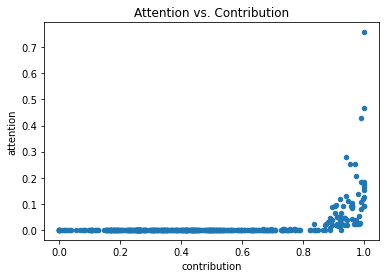

In [10]:
attention_and_normalized_contribution = attention_and_contribution.reset_index()\
    .groupby(["story", "line", "character"])[["contribution", "attention"]]\
    .apply(lambda x: x.apply(lambda y: (y - y.min()) / (y.max() - y.min()) if y.name == "contribution" else y))

attention_and_normalized_contribution.plot(kind="scatter", x="contribution", y="attention",
                                           title="Attention vs. Contribution")

Spearman's Rank-Order Correlation is used since there should be a positive monotonic relationship between single-path contribution and attention weight.

In [11]:
from scipy import stats

stats.spearmanr(attention_and_normalized_contribution.contribution,
                attention_and_normalized_contribution.attention)

SpearmanrResult(correlation=0.8639062114804261, pvalue=3.669044894609631e-130)

## Conclusion

Test statistics suggest a correlation between the single-path contribution and attention weight. Based on the scatter plot, we can infer that high attention-weights imply high single-path contribution, but high single-path contribution does not imply high-attention-weights.